## Analysis and Prediction on Travel Insurance Data

## Discription

The travel insurance company's aim is to see if customer are willing to purchase the travel insurance they provide. 
To complete this task, I have created an intelligent model that can foretell whether a customer would be interested in purchasing the travel insurance package using data from almost 2000 of its previous customers. I have used multiple methods to come to a conclusion and solve the company's problem of understanding customer requriements and their interest in their travel insurance. 

## Description of Fields

Age - Age of the individual.
Employment Type - What sector they work in.
GraduateOrNot - If they have graduated or not. 
AnnualIncome - What their yearly income is. 
FamilyMembers - How many people in their family. 
ChronicDiseases - If they suffer from any chronic diseases. 
FrequentFlyer - Do they travel often. 
EverTravelledAbroad - Travelling abroad. 
TravelInsurance - Travel Insurance purchase. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

## STEP 1: Importing the dataset in pandas dataframe form

In [23]:
df = pd.read_csv('files/TravelInsurancePrediction.csv')
df.head(10)

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   
5           5   25  Private Sector/Self Employed            No       1150000   
6           6   31             Government Sector           Yes       1300000   
7           7   31  Private Sector/Self Employed           Yes       1350000   
8           8   28  Private Sector/Self Employed           Yes       1450000   
9           9   33             Government Sector           Yes        800000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   
6              4                0            No                  No   
7              3                0           Yes                 Yes   
8              6                1           Yes                 Yes   
9              3                0           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0  
6                0  
7                1  
8                1  
9                0

## STEP 2: Data Exploration

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [25]:
print(df.head())  # Print the first few rows to get an overview of the data

   Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3       

In [26]:
# checking the number of null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [28]:
# checking for unique values in the dataframe
df.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

In [29]:
df.describe()

Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

## Observations

## STEP 3: Data Preparation - cleaning the dataset

In [30]:
# dropping the null values from the dataset

df = df.dropna()

# checking again if the dataset has any other missing or null values

df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [31]:
# Handle duplicate records if any
print(df.duplicated().sum())  # Check the number of duplicate records
df = df.drop_duplicates()  # Drop duplicate records

0


In [32]:
df.describe()

Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

## STEP 4: Data Analysis - Checking for the distribution of the features and identifying outliers

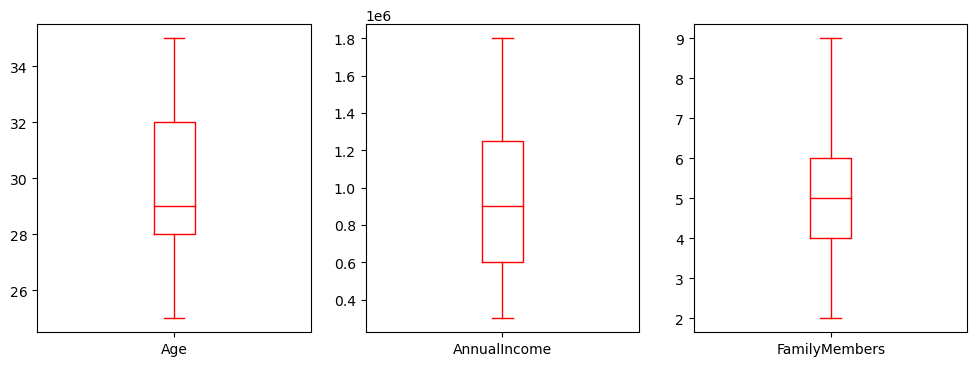

In [33]:
# Select numerical features (excluding categorical and target columns)
numerical_features = ['Age', 'AnnualIncome', 'FamilyMembers']

# Plot box plots for numerical features
df_plot = df[numerical_features]
df_plot.plot(kind='box', subplots=True, layout=(1, 3), sharex=False, sharey=False, figsize=(12, 4), color='red')
plt.show()

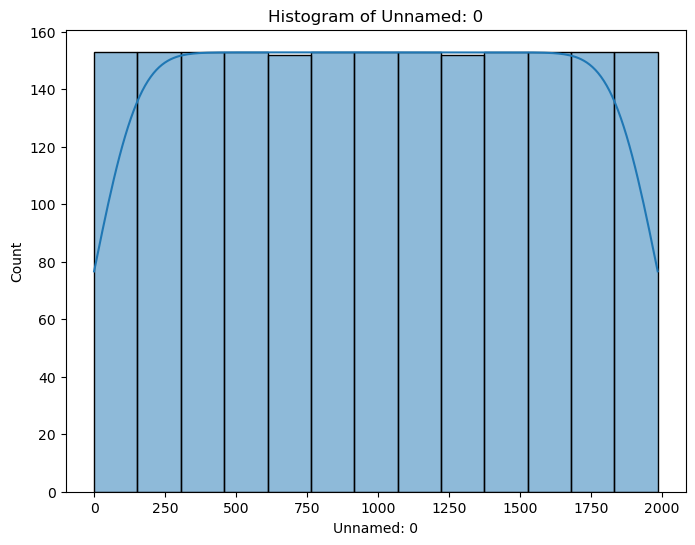

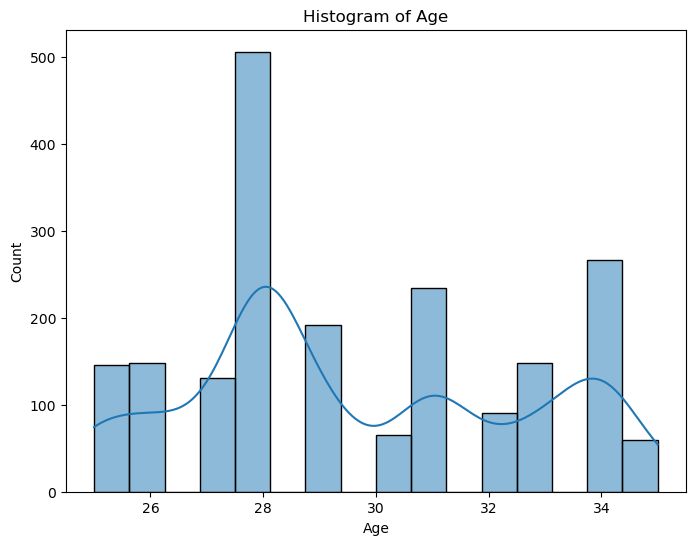

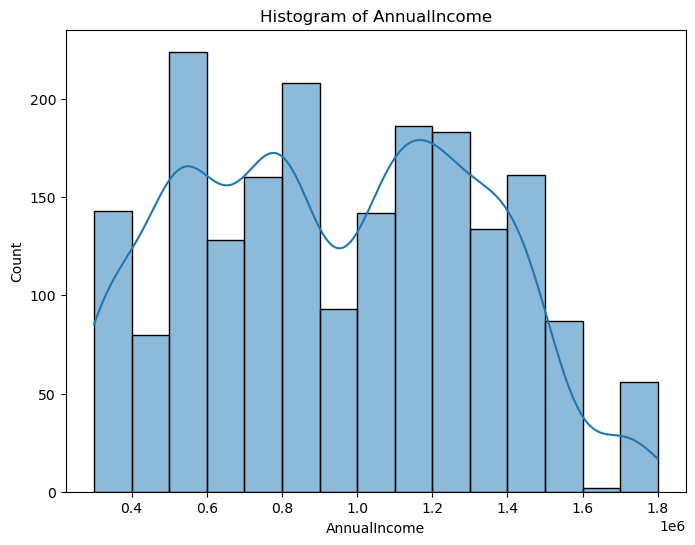

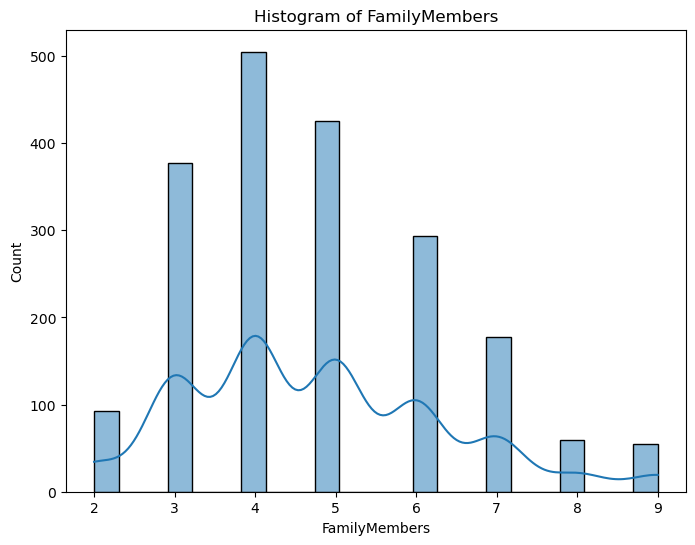

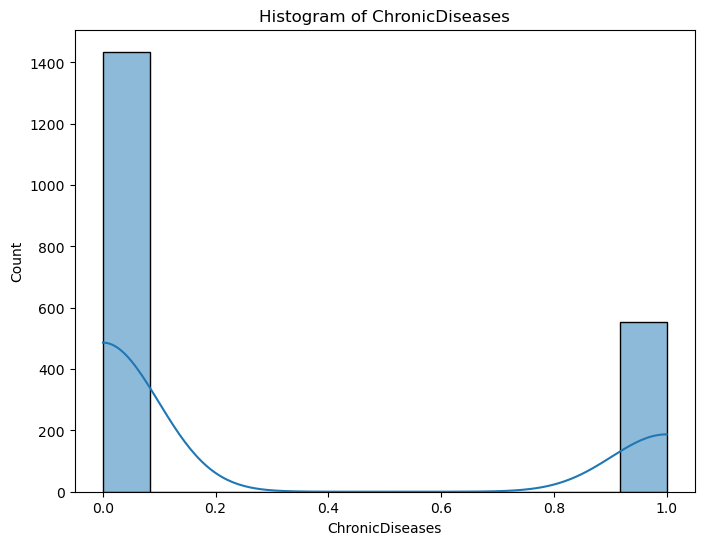

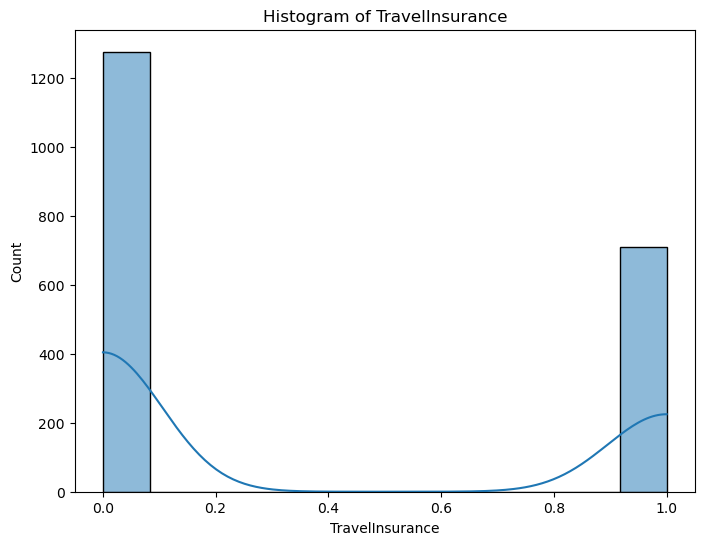

In [34]:
# Explore the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Histogram of {feature}")
    plt.show()

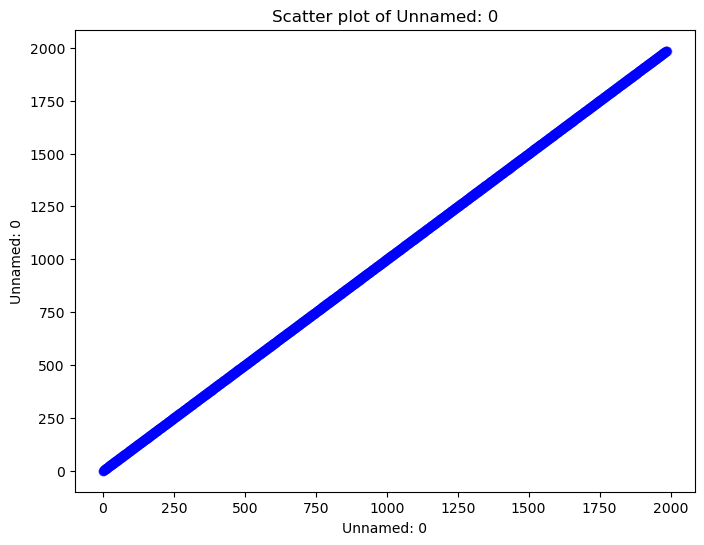

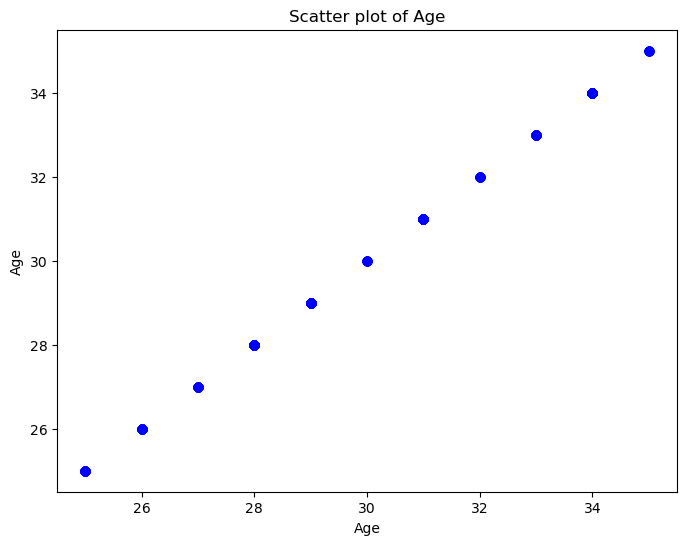

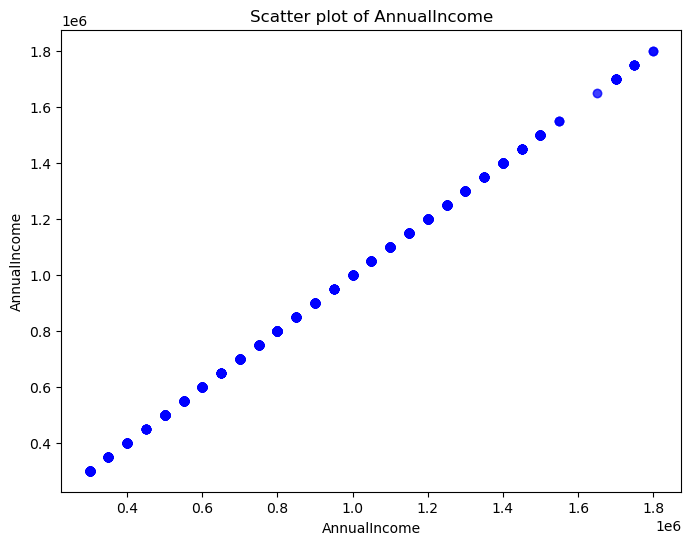

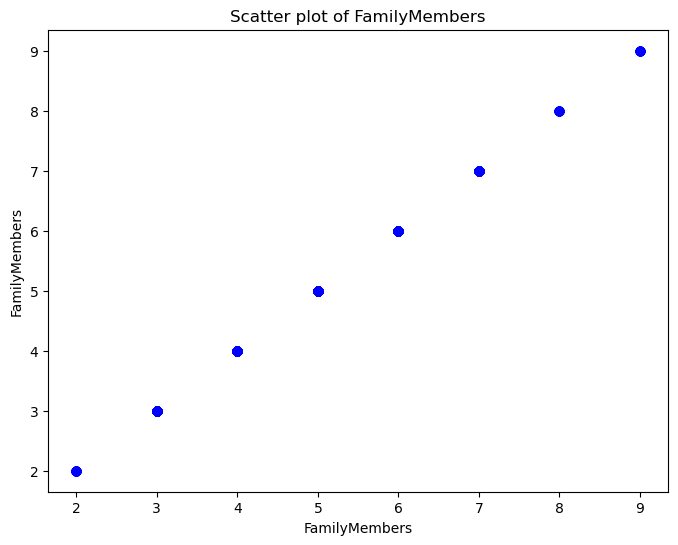

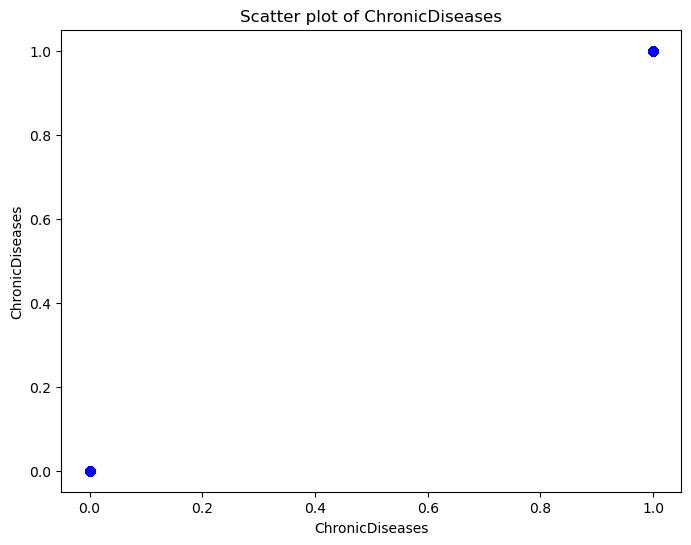

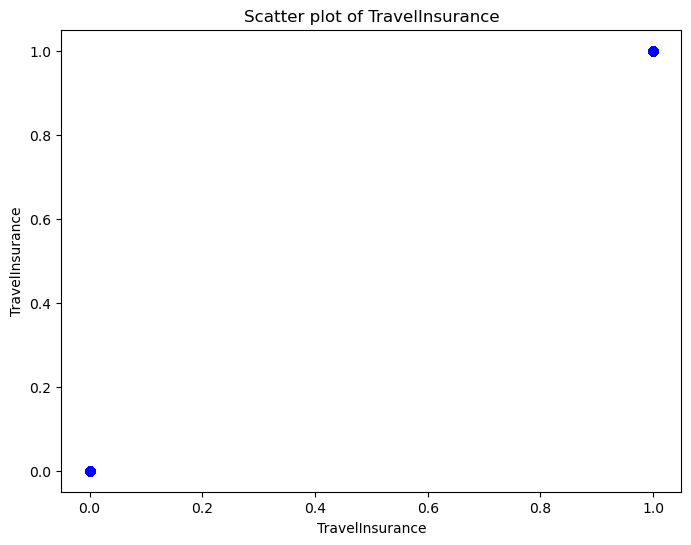

In [35]:
# Plot scatter plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df[feature], c='b', alpha=0.5)  # Plotting feature against itself
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.title(f'Scatter plot of {feature}')
    plt.show()

In [43]:
#using IQR, we can locate extreme values that can assist us eliminate outliers. 

# 1. Age
Q1 = np.percentile(df['Age'], 25, interpolation='midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation='midpoint')
IQR = Q3 - Q1

# Upper bound
upper_age = Q3 + 1.5 * IQR
lower_age = np.min(df['Age'])

print("Age Upper bound:", upper_age)
print("Lower bound for Age:", lower_age)


Age Upper bound: 38.0
Lower bound for Age: 25


In [44]:
# 2. AnnualIncome
Q1_income = np.percentile(df['AnnualIncome'], 25, interpolation='midpoint')
Q3_income = np.percentile(df['AnnualIncome'], 75, interpolation='midpoint')
IQR_income = Q3_income - Q1_income

# Upper bound for AnnualIncome
upper_income = Q3_income + 1.5 * IQR_income
lower_income = np.min(df['AnnualIncome'])

print("AnnualIncome Upper bound:", upper_income)
print("Lower bound for AnnualIncome:", lower_income)

AnnualIncome Upper bound: 2225000.0
Lower bound for AnnualIncome: 300000


In [45]:
# 3. FamilyMembers
Q1_members = np.percentile(df['FamilyMembers'], 25, interpolation='midpoint')
Q3_members = np.percentile(df['FamilyMembers'], 75, interpolation='midpoint')
IQR_members = Q3_members - Q1_members

# Upper bound for FamilyMembers
upper_members = Q3_members + 1.5 * IQR_members
lower_members = np.min(df['FamilyMembers'])

print("FamilyMembers Upper bound:", upper_members)
print("Lower bound for FamilyMembers:", lower_members)

FamilyMembers Upper bound: 9.0
Lower bound for FamilyMembers: 2


## STEP 5: Data Preparation - Removing the outliers and inappropriate features

In [98]:
# Remove any outliers

import pandas as pd
import numpy as np


df_name = 'df'
# Calculate the IQR for Age, AnnualIncome, and FamilyMembers
Q1_age = np.percentile(df['Age'], 25, interpolation='midpoint')
Q3_age = np.percentile(df['Age'], 75, interpolation='midpoint')
IQR_age = Q3_age - Q1_age

Q1_income = np.percentile(df['AnnualIncome'], 25, interpolation='midpoint')
Q3_income = np.percentile(df['AnnualIncome'], 75, interpolation='midpoint')
IQR_income = Q3_income - Q1_income

Q1_members = np.percentile(df['FamilyMembers'], 25, interpolation='midpoint')
Q3_members = np.percentile(df['FamilyMembers'], 75, interpolation='midpoint')
IQR_members = Q3_members - Q1_members

# Define the upper bounds for outliers
upper_age = Q3_age + 1.5 * IQR_age
upper_income = Q3_income + 1.5 * IQR_income
upper_members = Q3_members + 1.5 * IQR_members

# Remove the outliers
df_cleaned = df[(df['Age'] <= upper_age) & (df['AnnualIncome'] <= upper_income) & (df['FamilyMembers'] <= upper_members)]


In [99]:
# Print the updated DataFrame
df_cleaned.head(10)

Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   
5           5   25  Private Sector/Self Employed            No       1150000   
6           6   31             Government Sector           Yes       1300000   
7           7   31  Private Sector/Self Employed           Yes       1350000   
8           8   28  Private Sector/Self Employed           Yes       1450000   
9           9   33             Government Sector           Yes        800000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   
6              4                0            No                  No   
7              3                0           Yes                 Yes   
8              6                1           Yes                 Yes   
9              3                0           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0  
6                0  
7                1  
8                1  
9                0

We already have the "Employment Type" and "Annual Income" in our study dataset. We can learn about a customer's ability to take time off work and travel based on their employment type. The annual income reveals if they can travel and, thus, get travel insurance. Therefore, the "Graduate or Not" section is unnecessary. Therefore, as it is an inappropriate feature, we shall eliminate that portion.

In [100]:
# Remove the "GraduateOrNot" column
df_cleaned = df_cleaned.drop(['GraduateOrNot'], axis=1)

In [101]:
#'Unnamed' column is being removed because it is a unique identifier and is not relevant to our study.
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis=1)

In [102]:
# Print the updated DataFrame
df_cleaned.head(10)

Age               Employment Type  AnnualIncome  FamilyMembers  \
0   31             Government Sector        400000              6   
1   31  Private Sector/Self Employed       1250000              7   
2   34  Private Sector/Self Employed        500000              4   
3   28  Private Sector/Self Employed        700000              3   
4   28  Private Sector/Self Employed        700000              8   
5   25  Private Sector/Self Employed       1150000              4   
6   31             Government Sector       1300000              4   
7   31  Private Sector/Self Employed       1350000              3   
8   28  Private Sector/Self Employed       1450000              6   
9   33             Government Sector        800000              3   

   ChronicDiseases FrequentFlyer EverTravelledAbroad  TravelInsurance  
0                1            No                  No                0  
1                0            No                  No                0  
2                1            No                  No                1  
3                1            No                  No                0  
4                1           Yes                  No                0  
5                0            No                  No                0  
6                0            No                  No                0  
7                0           Yes                 Yes                1  
8                1           Yes                 Yes                1  
9                0           Yes                  No                0

In [114]:
# Converting the categorical features to numerical feature using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

# Select the categorical features to encode
categorical_features = ['Employment Type', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder to the categorical features and transform them
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

# Replace the original categorical features with the encoded features in the DataFrame
df_cleaned[categorical_features] = encoded_features

df_cleaned.head(10)

Age  Employment Type  AnnualIncome  FamilyMembers  ChronicDiseases  \
0   31              0.0        400000              6              1.0   
1   31              1.0       1250000              7              0.0   
2   34              1.0        500000              4              1.0   
3   28              1.0        700000              3              1.0   
4   28              1.0        700000              8              1.0   
5   25              1.0       1150000              4              0.0   
6   31              0.0       1300000              4              0.0   
7   31              1.0       1350000              3              0.0   
8   28              1.0       1450000              6              1.0   
9   33              0.0        800000              3              0.0   

   FrequentFlyer  EverTravelledAbroad  TravelInsurance  
0            0.0                  0.0                0  
1            0.0                  0.0                0  
2            0.0                  0.0                1  
3            0.0                  0.0                0  
4            1.0                  0.0                0  
5            0.0                  0.0                0  
6            0.0                  0.0                0  
7            1.0                  1.0                1  
8            1.0                  1.0                1  
9            1.0                  0.0                0

In [115]:
df_cleaned.shape

(1987, 8)

## NOTE: This dataset is is free of any null values or outliers that would have impacted the effectiveness of our models performed. The 1987 rows and 8 columns of this encoded dataset are prepared for further analysis.

## STEP 6: Data exploration of the new dataset

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verifying the distribution of the class we are aiming for: TravelInsurance
class_counts = df_cleaned['TravelInsurance'].value_counts()
print(class_counts)

0    1277
1     710
Name: TravelInsurance, dtype: int64


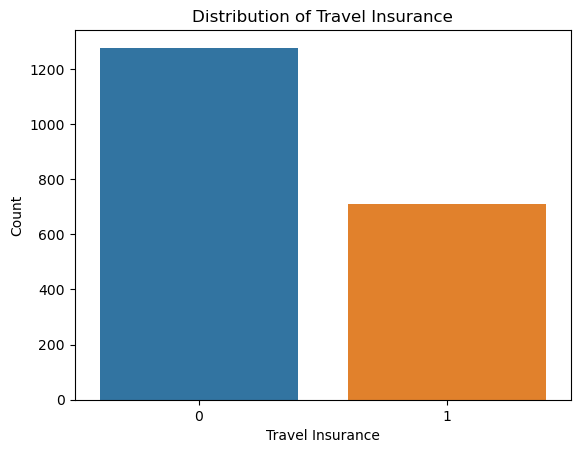

In [117]:
# Plot the distribution of the target class
sns.countplot(x='TravelInsurance', data=df_cleaned)
plt.xlabel('Travel Insurance')
plt.ylabel('Count')
plt.title('Distribution of Travel Insurance')
plt.show()


## Observations

Observations: 
- There were 1277 cases where insurance wasn't used.
- The total number of insurance claims was 710.
- There is an imbalance in our target class, i.e., there are differing numbers of samples of each of these catogores. 


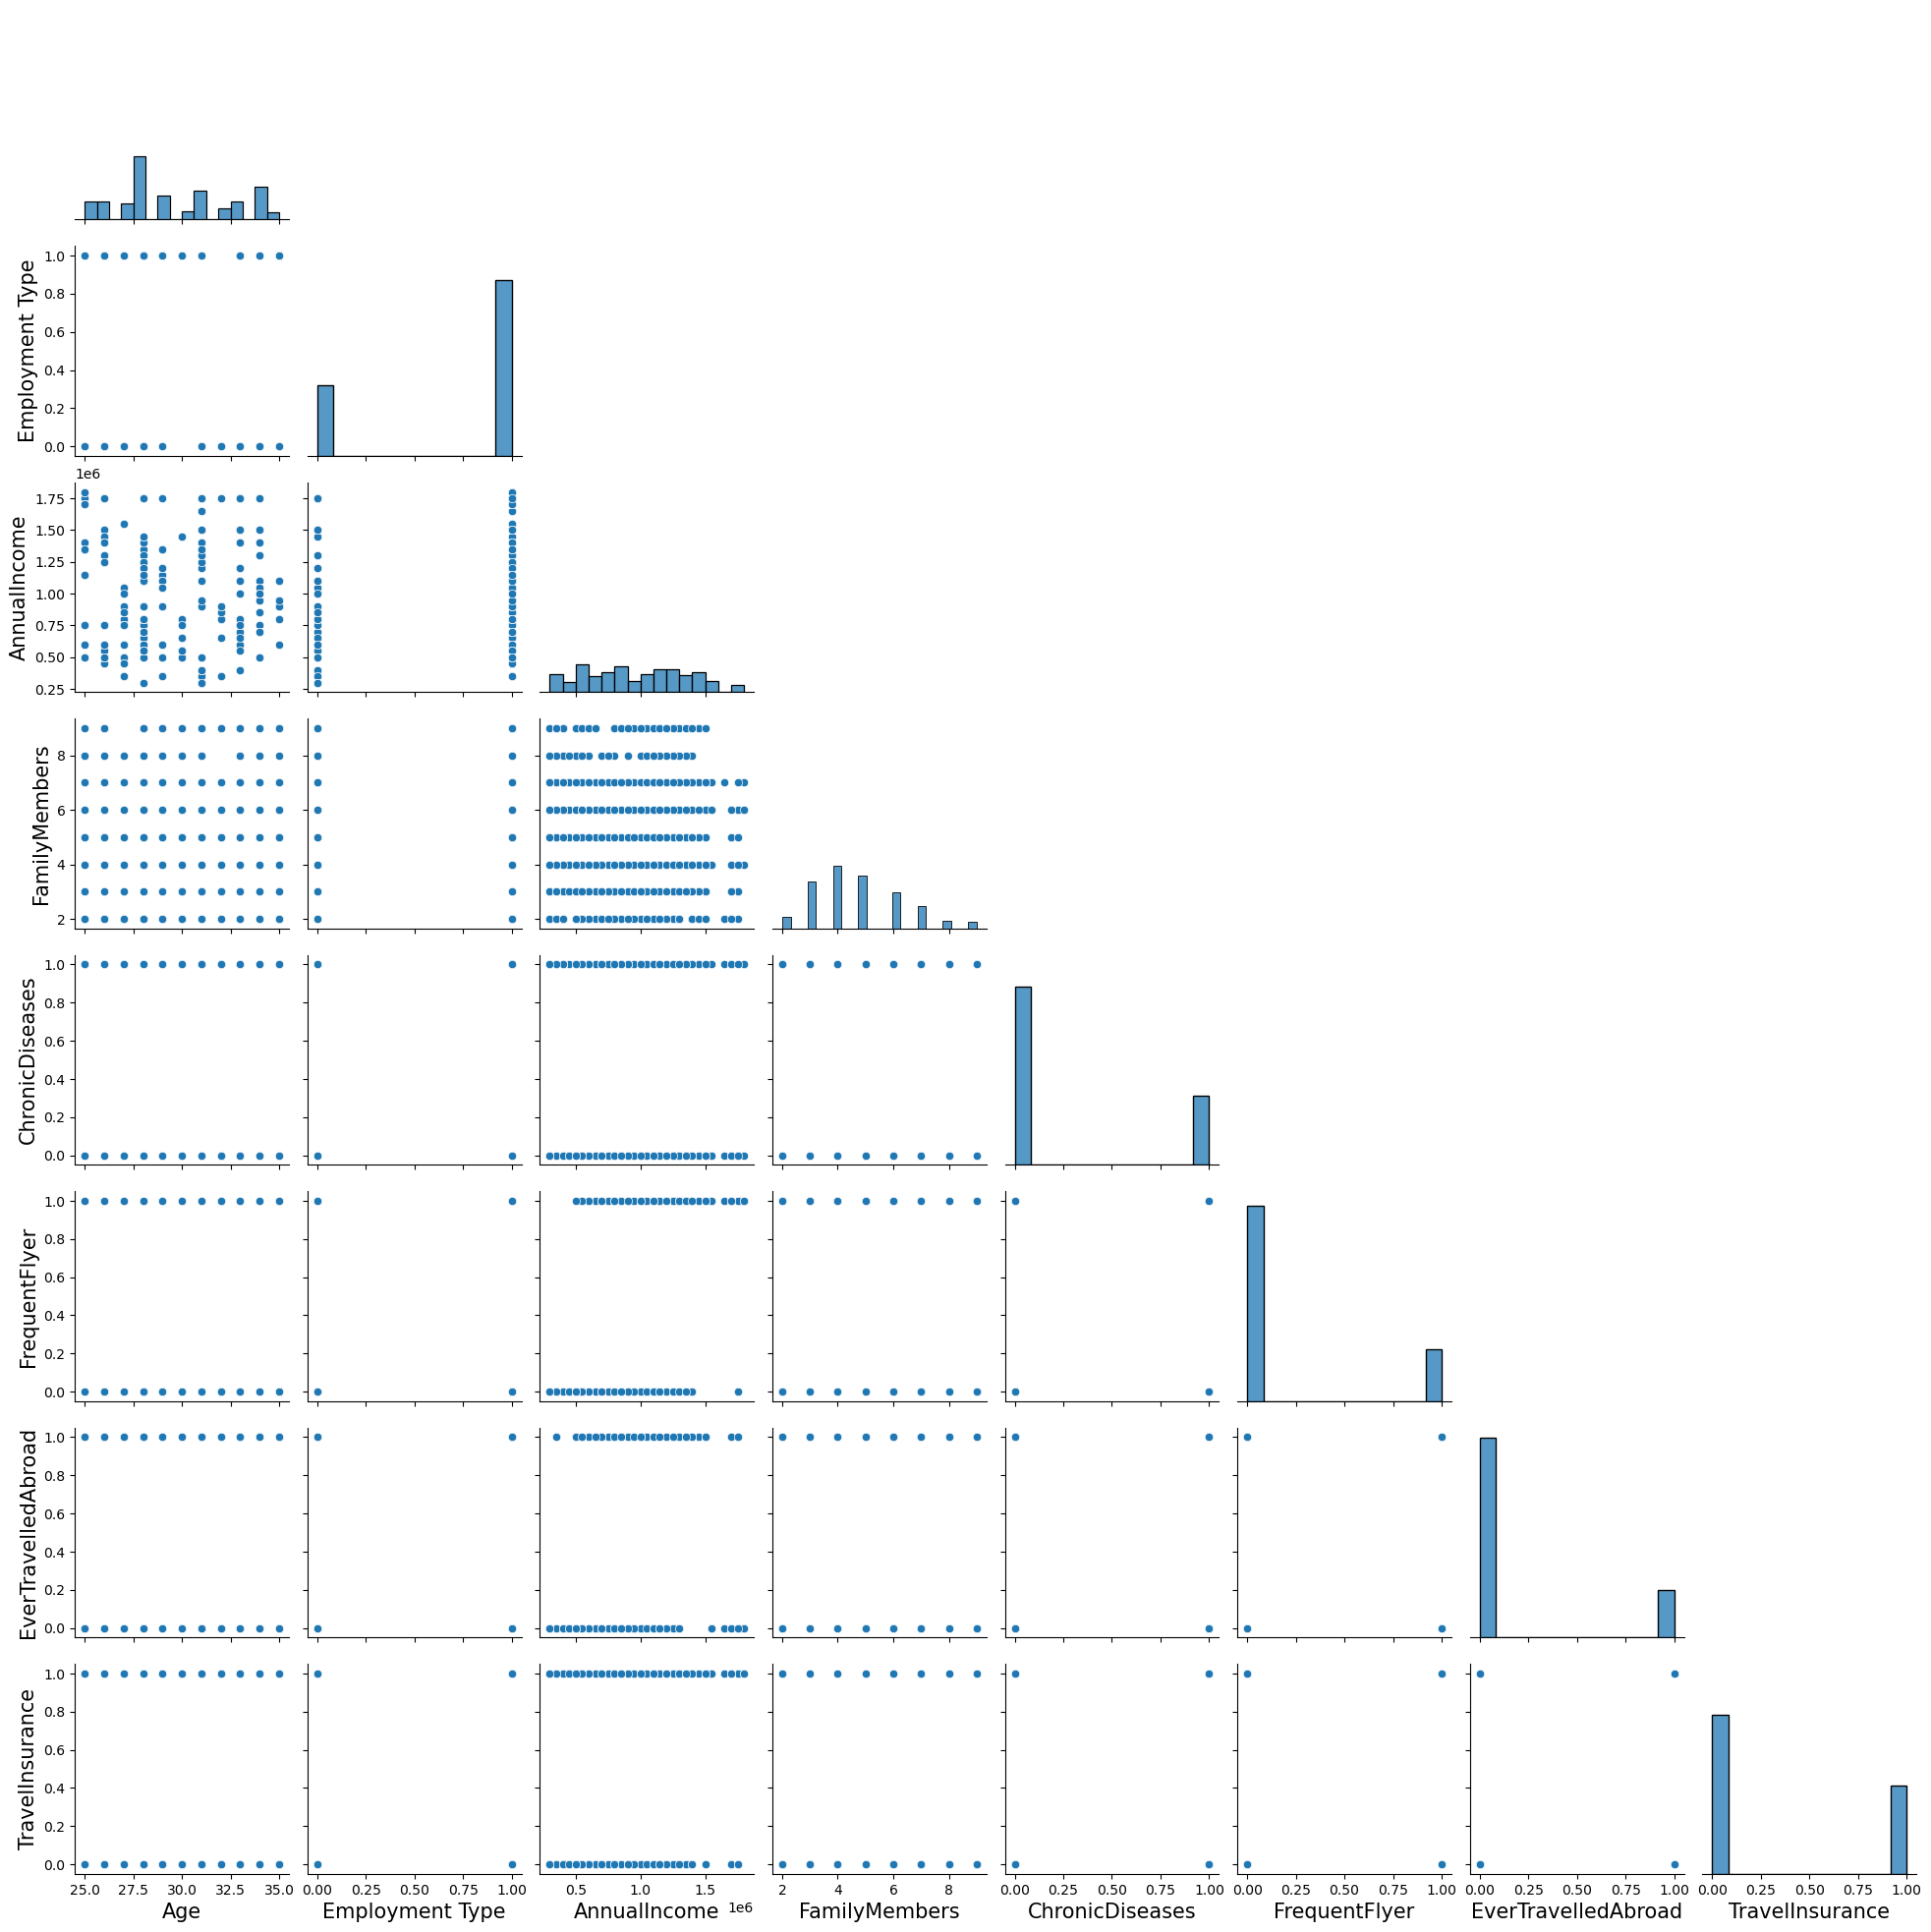

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.plotting_context(rc={"axes.labelsize": 15}):
    sns.pairplot(df_cleaned, corner=True)

plt.show()



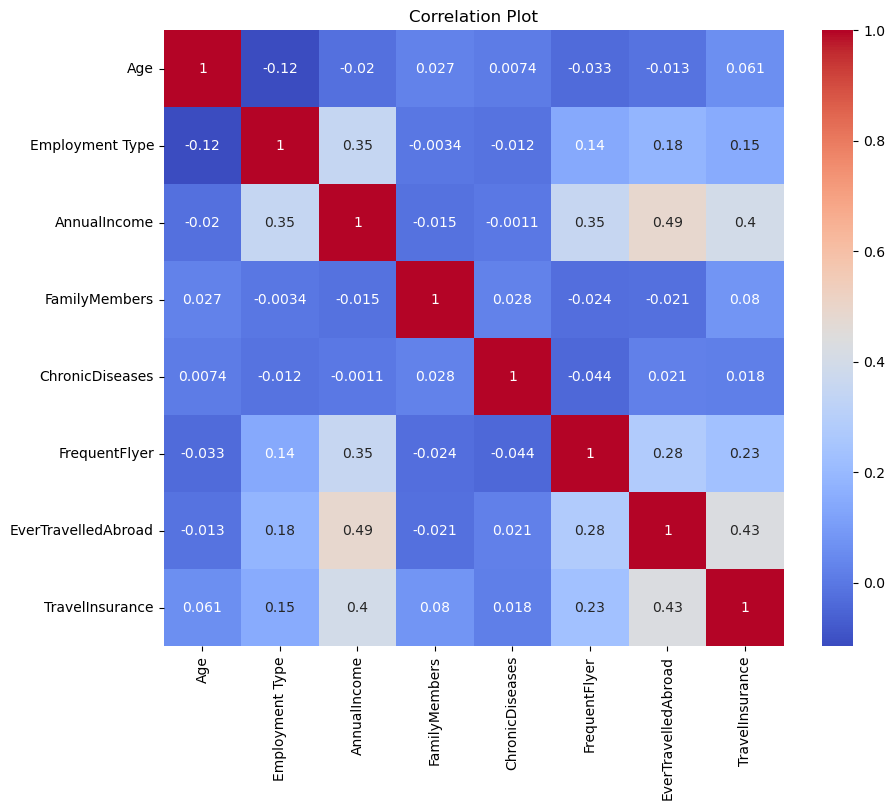

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


## Observations

There is a linear relationship between "Annual income" and "Ever Travelled Abroad". This is clearly shown by the 0.49 correlation. 

With this correlation, we can see that there is also a semi linear correlation between "Travel Insurance" and "Ever Travelled Abroad". Hence, it's fair to say that if you have a decent annual income, you would have travelled abroad and hence got travel insurance. 

Similarly, there is a low positive correlation between "Frequent Flyer" and "Annual Income"


 ## Train-test split

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' containing the travel insurance prediction data

# Splitting the data into features (X) and target variable (Y)
X = df.drop('TravelInsurance', axis=1)
Y = df['TravelInsurance']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Printing the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1589, 9)
y_train shape: (1589,)
X_test shape: (398, 9)
y_test shape: (398,)


## Step 7 - Logistic Regression Model

In [134]:
from sklearn.preprocessing import OrdinalEncoder

# Combine training and test data
X_combined = pd.concat([X_train, X_test])

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the combined data and transform both training and test data
X_combined_encoded = encoder.fit_transform(X_combined)
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Now you can proceed with training the logistic regression model
lr = LogisticRegression(max_iter=1000).fit(X_train_encoded, y_train)

# Make predictions on training and test set
y_pred_train = lr.predict(X_train_encoded)
y_pred_test = lr.predict(X_test_encoded)

# Calculate accuracy score on training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:", accuracy_train)

# Calculate accuracy score on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy_test)


Accuracy on training set: 0.777218376337319
Accuracy on test set: 0.7663316582914573


In [160]:
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Use the 'liblinear' solver

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

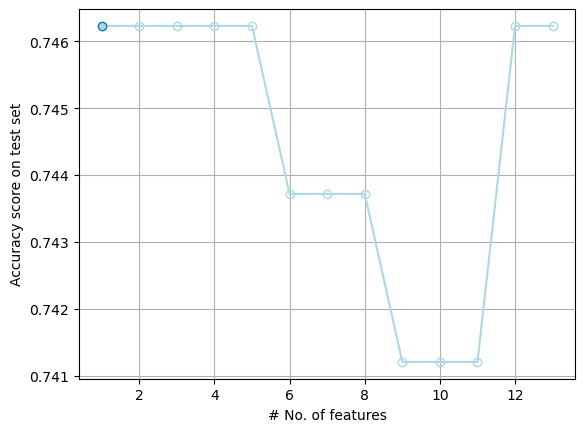

Best number of features:  1


In [181]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Assuming you have a DataFrame named 'df' with 'Claim' as the target variable and other features

# Separate the target variable from the features
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

# Perform one-hot encoding on the features
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
lr = LogisticRegression()

# Perform RFE for different numbers of features
acc_scores = []
for i in range(1, len(X_train.columns) + 1):
    selector = RFE(lr, n_features_to_select=i)
    selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.support_]
    
    # Train a logistic regression model with the selected features
    lr.fit(X_train[selected_features], y_train)
    
    # Make predictions on the test set
    y_pred = lr.predict(X_test[selected_features])
    
    # Calculate accuracy score and append to the list
    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append(acc_score)

# Find the best number of features with the highest accuracy score
best_num_features = acc_scores.index(max(acc_scores)) + 1

# Plotting the graph
plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, len(X_train.columns) + 1), acc_scores, marker='o', color='lightblue', markeredgewidth=1, markeredgecolor='lightblue', markerfacecolor='None')
plt.plot(best_num_features, acc_scores[best_num_features - 1], marker='o', markerfacecolor='lightblue')
plt.show()

print("Best number of features: ", best_num_features)


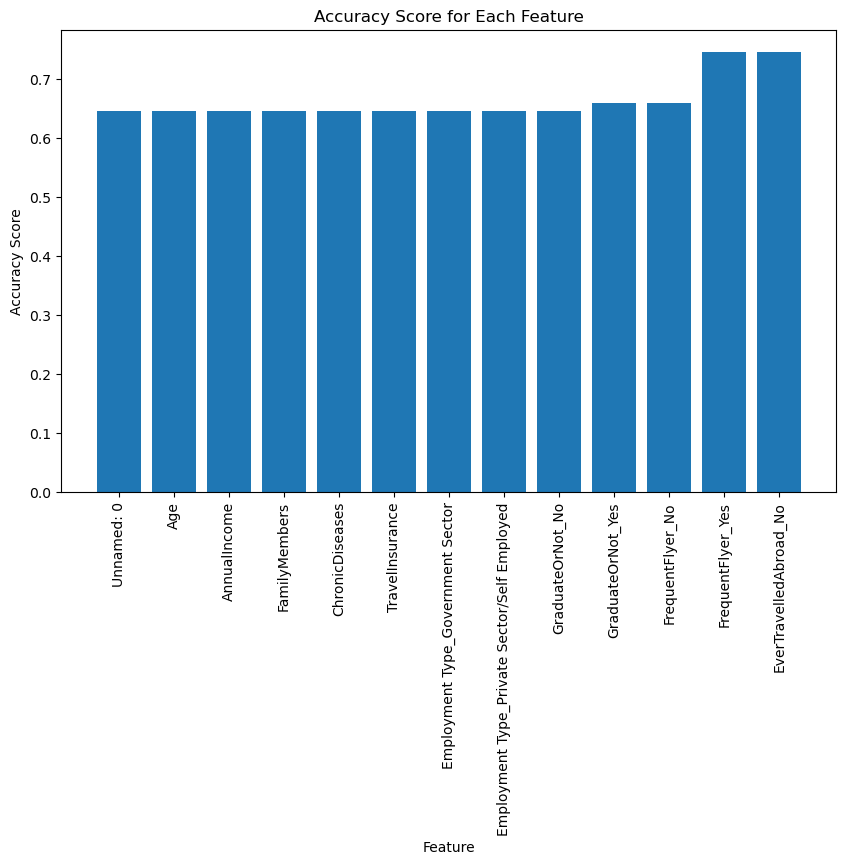

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Extract the target variable
y = df["TravelInsurance"]

# Encode categorical variables
categorical_cols = df.select_dtypes(include="object").columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# List to store accuracy scores
accuracy_scores = []

# Iterate over each feature column (excluding "TravelInsurance")
for feature in df_encoded.columns:
    if feature != "TravelInsurance":
        # Create a new DataFrame with the selected feature column
        X = df_encoded[[feature]]
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create an instance of LogisticRegression
        lr = LogisticRegression()
        
        # Fit the model on the training data
        lr.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = lr.predict(X_test)
        
        # Calculate accuracy score and add it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(df_encoded.columns[:-1], accuracy_scores)
plt.xlabel("Feature")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for Each Feature")
plt.xticks(rotation=90)
plt.show()


## STEP 8: ADVANCE MODEL: KNN Classifier Model

In [177]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Separate the features (X) and the target variable (y)
X = data.drop("TravelInsurance", axis=1)
y = data["TravelInsurance"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the columns to be scaled and one-hot encoded
numerical_cols = ['Age', 'AnnualIncome', 'FamilyMembers']
categorical_cols = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']

# Create a preprocessor to apply scaling and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

# Apply the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier on the preprocessed training data
knn.fit(X_train_preprocessed, y_train)

# Predict on the preprocessed test data
y_pred = knn.predict(X_test_preprocessed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7763819095477387


## STEP 9: ADVANCE MODEL: Gaussian Naive Bayes

In [183]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset and preprocess it
# Assuming you have already loaded your dataset into a variable called 'data'
# You can use the same dataset you mentioned earlier

# Separate the features (X) and the target variable (y)
X = data.drop("TravelInsurance", axis=1)
y = data["TravelInsurance"]

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7386934673366834


## STEP 10: COMPARING OUR ADVANCED MODELS

The following findings can be obtained from an analysis of the travel insurance prediction using three alternative models: Logistic Regression, K-Nearest Neighbours (KNN), and Gaussian Naive Bayes (GNB).

The accuracy of the Logistic Regression model was: 0.777218376337319(Accuracy on training set) & 0.7663316582914573 (Accuracy on test set), the accuracy of the KNN model was 0.7763819095477387, and the accuracy of the GNB model was 0.7386934673366834.

When the accuracy of the models was compared, it was found that the KNN model performed better than both the Logestic Regression and GNB models, suggesting that it is more effective at predicting travel insurance. It is crucial to remember that the effectiveness of each model can change based on the particular dataset and its features.

This analysis offers useful information for making decisions in the area of forecasting travel insurance. Achieved accuracy of Logistic Regression model can be the simpler method however the KNN method did have a slight higher accuracy score. 

## Conclusion

In order to make decisions on anticipating travel insurance, this analysis provides important information. According to the KNN Model's accuracy results, it may be able to accurately classify those who are likely to purchase travel insurance. Using this information, insurance companies can alter their pricing strategies, risk assessment processes, and marketing strategies.

different analysis, such as feature engineering, model fine-tuning, and the evaluation of different models, could increase the predictive power and accuracy of the travel insurance prediction study. Additionally, accounting for extra factors such client demographics may lead to more accurate estimates and in-depth understanding of the travel insurance market.
